In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("Input/Lens_Simulation.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

306.35498585799917


In [5]:
#parameters of best walker
best_walker = chain[best_log][1]

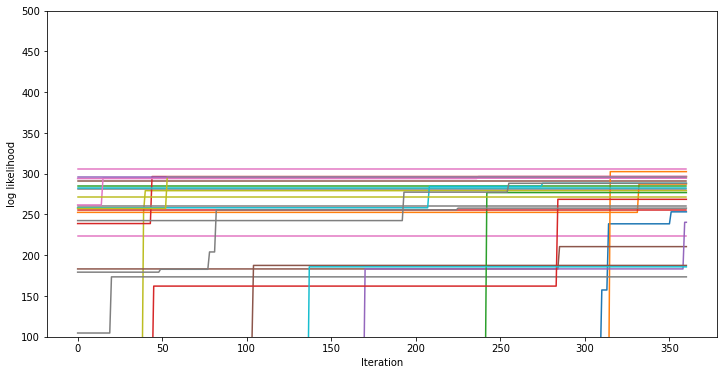

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(100, 500)
    plt.xlim()
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

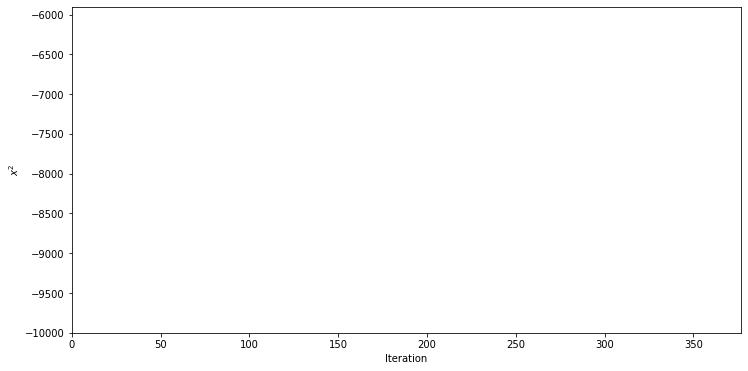

In [7]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5900)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [8]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 93


array([11.,  2.,  0.,  6.,  1.,  3.,  0.,  4.,  3.,  1.,  1.,  4.,  1.,
        1.,  1.,  0.,  3.,  3.,  2.,  3.,  3.,  1.,  2.,  3.,  2.,  0.,
        2.,  0.,  2.,  1.,  5.,  1.,  0.,  1.,  1.,  1.,  2.,  1.,  1.,
        2.,  1.,  1.,  0.,  1.,  3.,  2.,  0.,  0.,  2.,  2.,  3.,  1.,
        1.,  2.,  2.,  0.,  2.,  0.,  3.,  0.,  0.,  3.,  1.,  2.,  3.,
        2.,  3.,  0.,  9.,  3.,  5.,  2.,  1.,  0.,  0.,  2.,  0.,  1.,
        0.,  2.,  1.,  2.,  2.,  2.,  3.,  2.,  1.,  1.,  2.,  1.,  3.,
        3.,  2.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        2.,  2.,  0.,  4.,  1.,  2.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,
        2.,  2.,  1.])

/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:41: RuntimeWarning: invalid value encountered in less
  m = np.arange(len(taus)) < c * taus
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:99: RuntimeWarning: invalid value encountered in greater
  flag = tol * tau_est > n_t


[nan nan nan nan nan nan nan]
flat chain shape: (43320, 7)
flat log prob shape: (43320,)


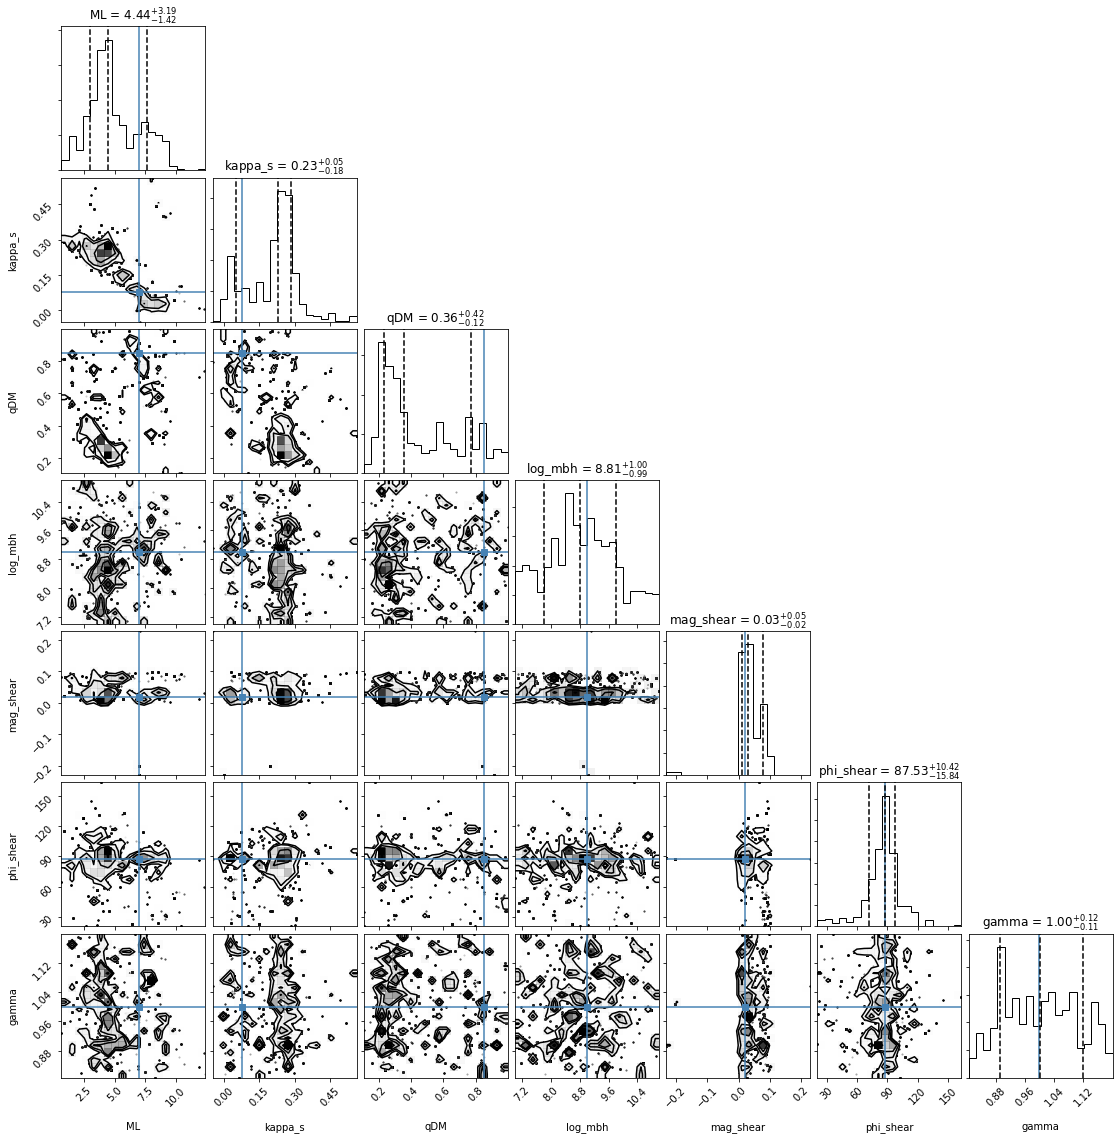

In [13]:
#Corner plots

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]
truth = [7.00, 0.075, 0.85, 9.00, 0.02, 88.0, 1.00]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, truths=truth);

flat chain shape: (6240, 7)
flat log prob shape: (6240,)


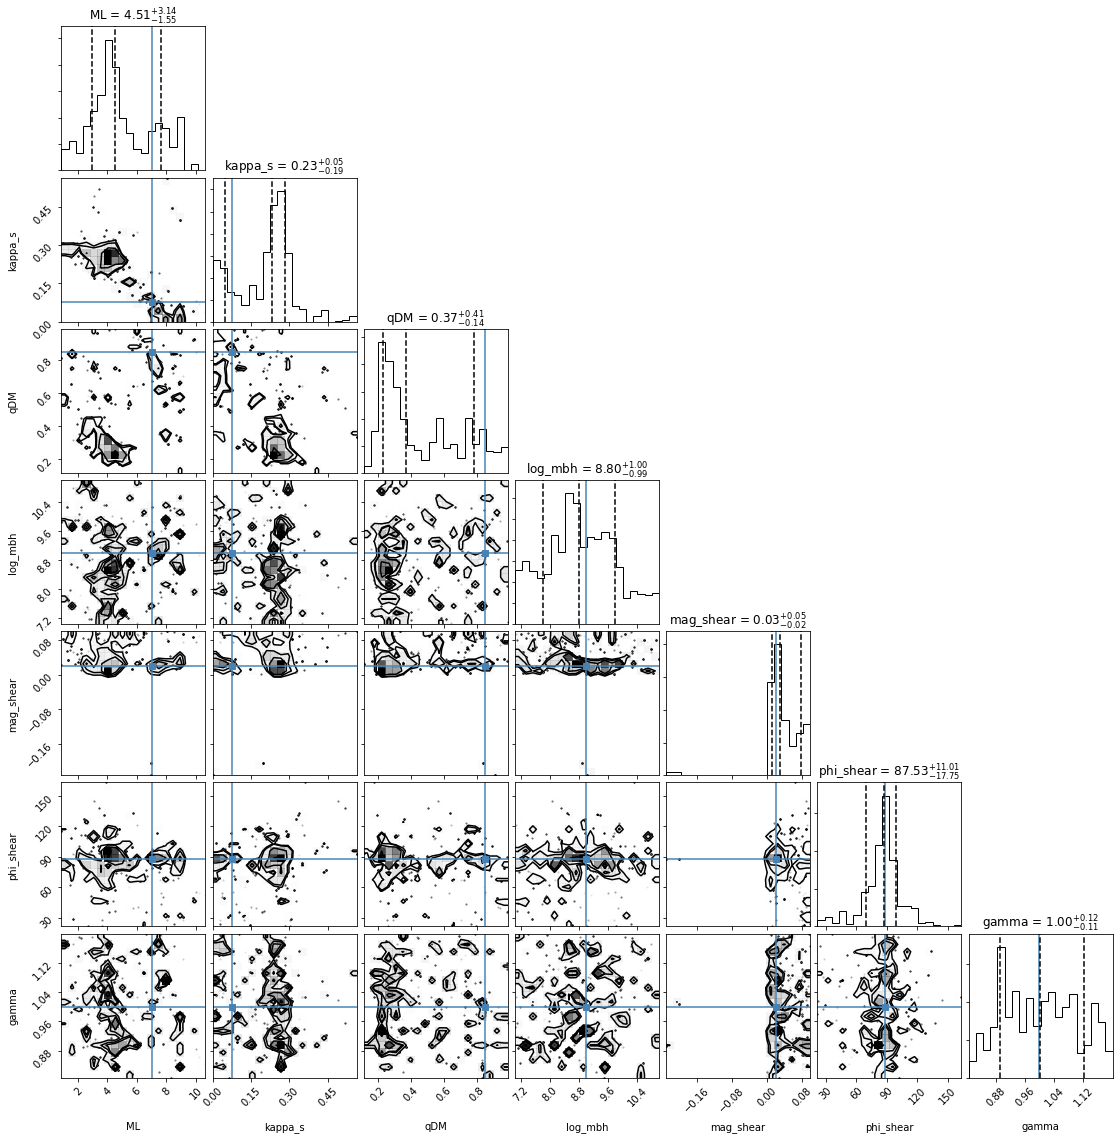

In [12]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)
truth = [7.00, 0.075, 0.85, 9.00, 0.02, 88.0, 1.00]

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, truths=truth);

In [14]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(7):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
tau = read.get_autocorr_time(tol=0)
print(tau, read.iteration/50)

[nan nan nan nan nan nan nan] 7.22


/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:41: RuntimeWarning: invalid value encountered in less
  m = np.arange(len(taus)) < c * taus
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:99: RuntimeWarning: invalid value encountered in greater
  flag = tol * tau_est > n_t


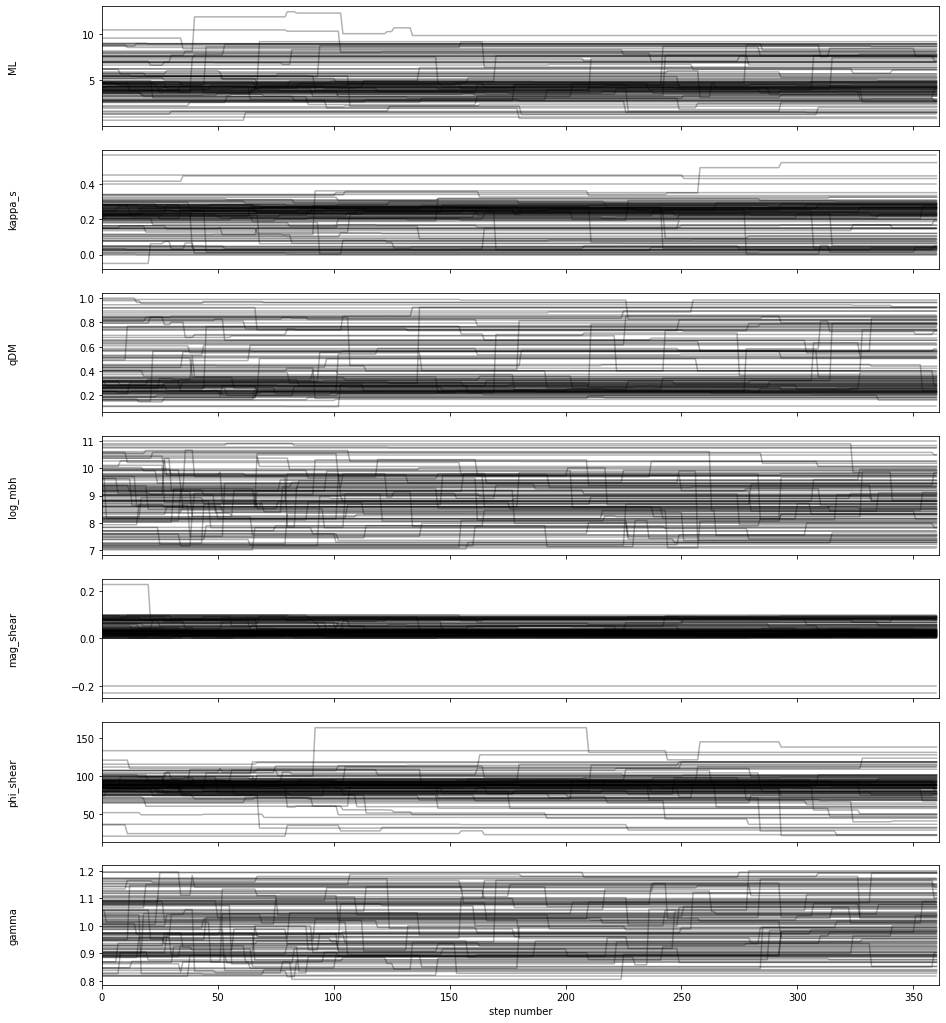

In [16]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [12]:
it, accep_tot, time, accep_100 = np.loadtxt("Input/Output_LogFile.txt", unpack=True)

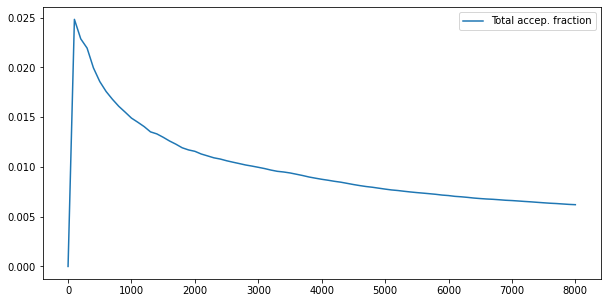

In [13]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

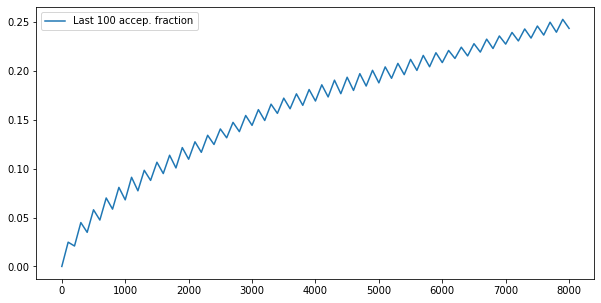

In [14]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [17]:
#Control time packages
import time
import os
os.environ["OMP_NUM_THREADS"] = "1"

#MPI
from schwimmbad import MPIPool

#General packages
import numpy as np
import emcee
import matplotlib.pyplot as plt

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
from astropy.constants import G, M_sun, c
import astropy.units as u

#Autolens Model packages
import autolens as al
import autolens.plot as aplt

#My Emcee for Pyautolens
import My_Autolens

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_5/Simulation_Data/"

In [19]:
#Reading MGE inputs
surf_lum, sigma_lum, qobs_lum = np.loadtxt("Input/JAM_Input.txt", unpack=True)      #MGE decomposition
surf_dm, sigma_dm , qobs_dm   = np.loadtxt("Input/eNFW.txt", unpack=True)             #DM component

## Models inicialization

"""
    To inicialize the model, we set some random values for the parameters. But it's only necessary for initialize the model. During the non-linear search, this values will be updated constantly until the best fit.
"""  
#Only for lensing modelling 
z_l    = 0.299                                                         #Lens Redshift
z_s    = 4.100                                                         #Source Redshift 
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to lens [Mpc] 
mbh    = 1e9                                                           #mass of black hole [log10(M_sun)]
kappa_ = 0.075                                                         #kappa_s of DM profile
ml     = 7.00                                                          #mass to light ratio
r_s    = 11.5                                                          #scale radius [arcsec]
shear_comp = al.convert.shear_elliptical_comps_from(magnitude=0.02, phi=88) #external shear


#Autolens Data
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )

mask        = al.Mask.from_fits( file_path=f"{data_folder}/new_mask.fits", hdu=1, 
                                pixel_scales=imaging.pixel_scales)

masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)   #Masked image
#aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

#--------------------------------------------------------------------------------------------------#
# PYAUTOLENS MODEL
#MGE mass profile
mass_profile = al.mp.MGE()    #Mass class

ell_comps    = al.convert.elliptical_comps_from(axis_ratio=qobs_dm[0], phi=0.0) #Elliptical components in Pyautolens units
eNFW         = al.mp.dark_mass_profiles.EllipticalNFW(kappa_s=kappa_, elliptical_comps=ell_comps ,scale_radius=r_s) #Analytical eNFW profile


#Components
#Do not include MGE DM component here
mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                       surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml, mbh=mbh) 
mass_profile.Analytic_Model(eNFW)  #Include Analytical NFW
emcee_model = My_Autolens.Models(mass_profile=mass_profile, masked_imaging=masked_image, quiet=False)
emcee_model.include_DM_analytical(eNFW)

In [28]:
eNFW.summarize_in_units

<bound method AbstractEllipticalGeneralizedNFW.summarize_in_units of EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.08108108108108109)
axis_ratio: 0.8499999999999999
phi: 0.0
kappa_s: 0.075
scale_radius: 11.5
inner_slope: 1.0>

## Best Model

In [20]:
p0 = best_fit
p0

array([4.44271863e+00, 2.30520620e-01, 3.57525200e-01, 8.80698394e+00,
       3.13713399e-02, 8.75282270e+01, 1.00085086e+00])

ParsDic:
#------------------------------------#
{'ml': 4.442718628684603, 'kappa_s': 0.23052061951390157, 'qDM': 0.3575252003615674, 'log_mbh': 8.806983938728978, 'mag_shear': 0.031371339879369485, 'phi_shear': 87.52822700882169, 'gamma': 1.0008508637314062}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.4732691514436077)
axis_ratio: 0.3575252003615675
phi: 0.0
kappa_s: 0.23052061951390157
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: -221.49777622241322
Log Normalization -1535.9313959117017
Log Evidence: -480.60924590758646
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 1.0008508637314062
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.4732691514436077)
axis_ratio: 0.3575252003615675
phi: 0.0
kapp

<Figure size 720x720 with 0 Axes>

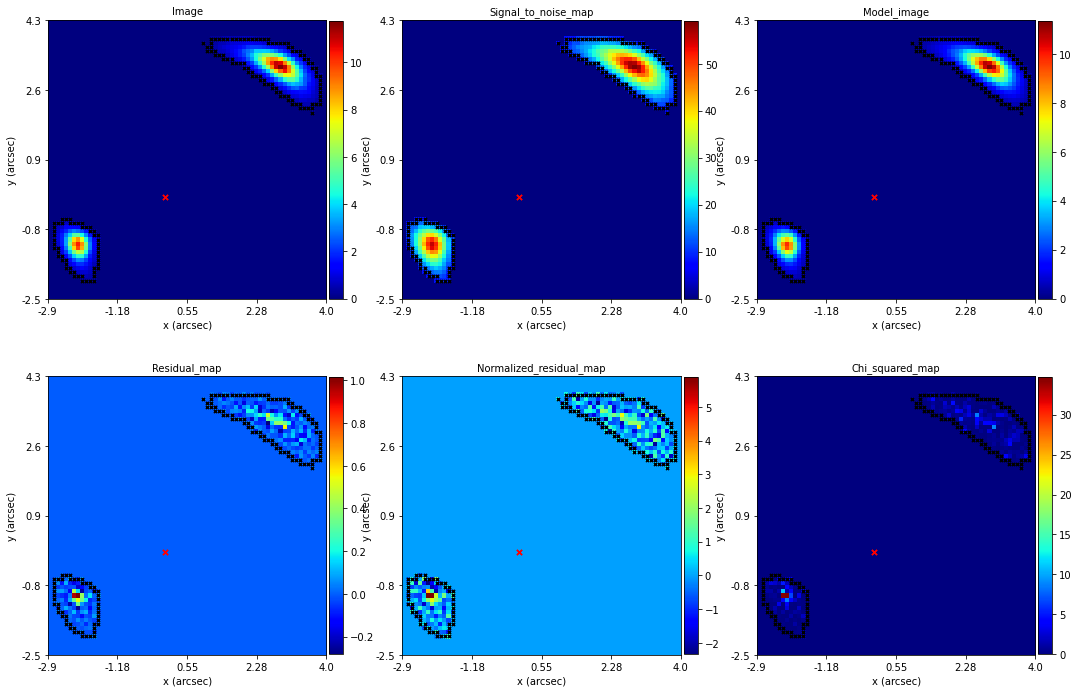

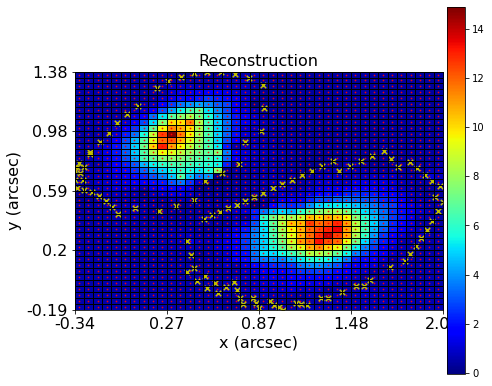

-221.49792101623112

In [21]:
plt.figure(figsize=(10,10))
emcee_model(p0)

## Best likelihood

In [26]:
p0 = best_walker
p0

array([7.50179511e+00, 7.50706730e-02, 6.20105697e-01, 8.99460478e+00,
       8.83722049e-04, 8.76379503e+01, 9.31832208e-01])

ParsDic:
#------------------------------------#
{'ml': 7.501795110136056, 'kappa_s': 0.07507067299844858, 'qDM': 0.6201056972181018, 'log_mbh': 8.994604776776793, 'mag_shear': 0.0008837220493673678, 'phi_shear': 87.6379502562778, 'gamma': 0.9318322076451535}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.23448735686456637)
axis_ratio: 0.6201056972181018
phi: 0.0
kappa_s: 0.07507067299844858
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: 307.28435544090536
Log Normalization -1535.9313959117017
Log Evidence: 60.53574154322109
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 0.9318322076451535
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.23448735686456637)
axis_ratio: 0.6201056972181018
phi: 0.0
kappa

<Figure size 720x720 with 0 Axes>

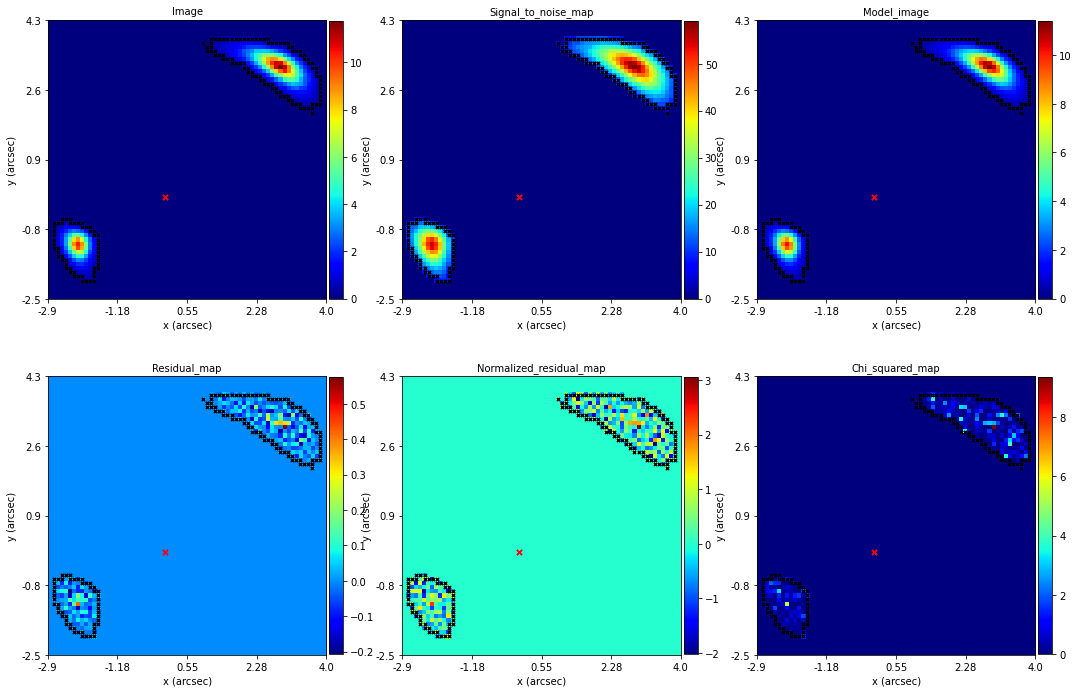

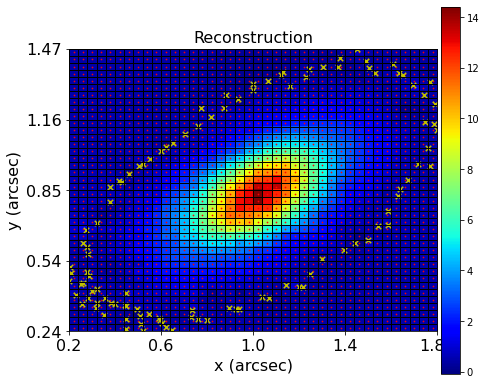

306.35498585799866

In [27]:
plt.figure(figsize=(10,10))
emcee_model(p0)

(0.9, 1.1)

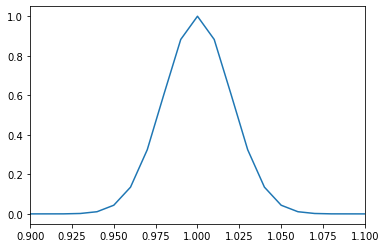

In [54]:
import matplotlib.pyplot as plt
x = np.arange(0, 2, 0.01)
exp = np.e**(-0.5 * (x - 1)**2/0.02**2)
plt.plot(x, exp)
plt.xlim(0.9, 1.1)